# Import Data 

In [185]:

macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Convert to time series

In [186]:
# Convert year & quarter to integers
macro_econ_data['year'] = macro_econ_data['year'].astype(int)
macro_econ_data['quarter'] = macro_econ_data['quarter'].astype(int)

In [187]:
# Convert year & quarter to datetime format
macro_econ_data['date'] = pd.to_datetime(macro_econ_data['year'].astype(str) + 'Q' + macro_econ_data['quarter'].astype(str))

In [188]:
macro_econ_data.set_index('date', inplace=True)


In [189]:

# Drop original year and quarter columns
macro_econ_data.drop(columns=['year', 'quarter'], inplace=True)

In [190]:
macro_econ_data.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,
1959-01-01,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [152]:
# # Convert year & quarter to integers
# macro_econ_data['year'] = macro_econ_data['year'].astype(int)
# macro_econ_data['quarter'] = macro_econ_data['quarter'].astype(int)

# # Convert year & quarter to datetime format
# macro_econ_data['date'] = pd.to_datetime(macro_econ_data['year'].astype(str) + 'Q' + macro_econ_data['quarter'].astype(str))

# # macro_econ_data.index = pd.PeriodIndex(macro_econ_data['date'], freq='Q')

# # # Set as time series index
# macro_econ_data.set_index('date', inplace=True)


In [153]:

# Drop original year and quarter columns
macro_econ_data.drop(columns=['year', 'quarter'], inplace=True)


In [154]:
macro_econ_data.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,
1959-01-01,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# Data Analysis And Visualization

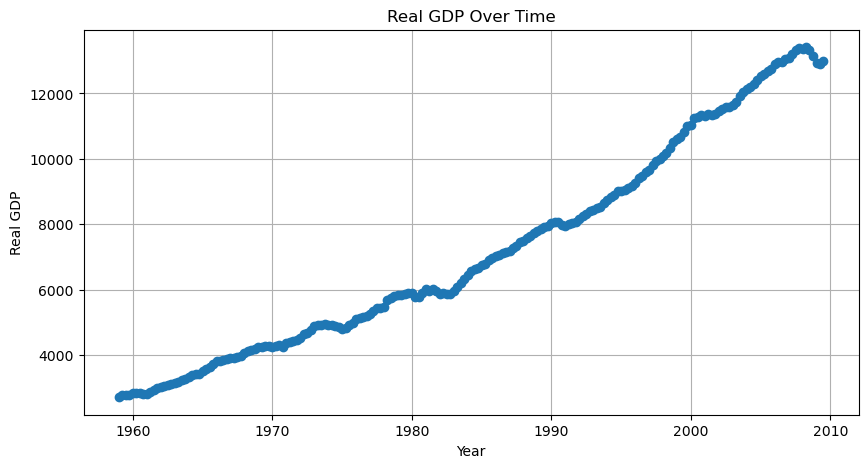

In [191]:

# Plot real GDP over time
plt.figure(figsize=(10, 5))
plt.plot(macro_econ_data.index, macro_econ_data['realgdp'], marker='o', linestyle='-')

# Formatting the plot
plt.title("Real GDP Over Time")
plt.xlabel("Year")
plt.ylabel("Real GDP")
plt.grid(True)
plt.show()

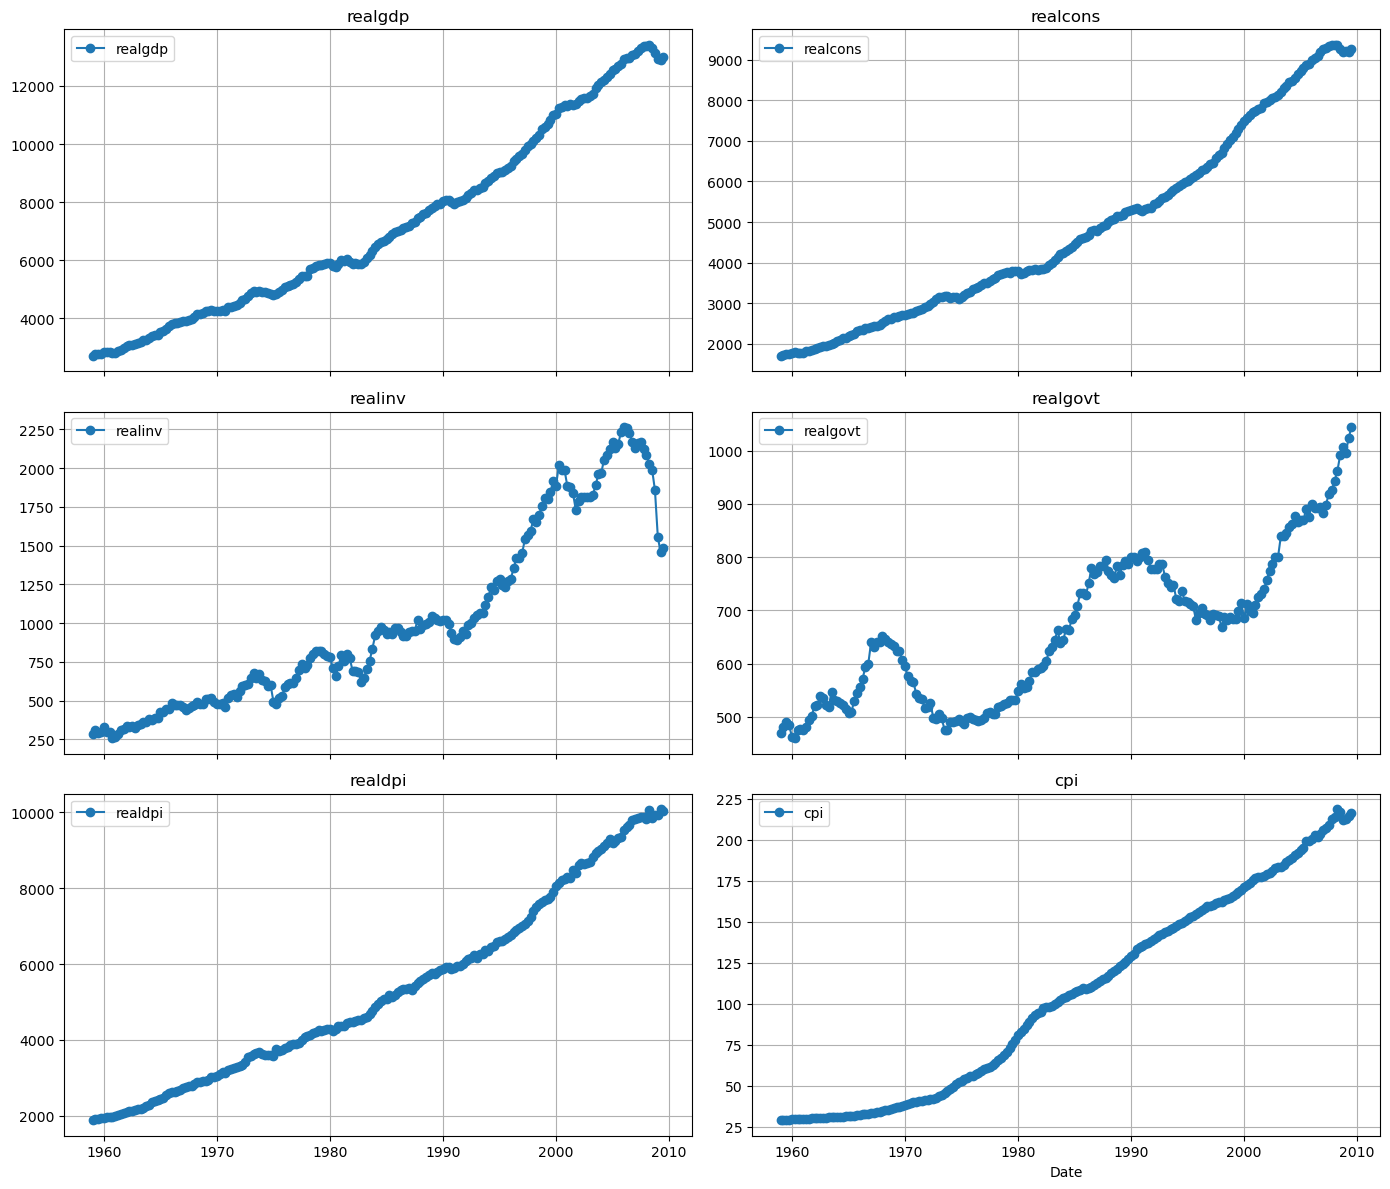

In [192]:
# Select the first 6 columns
data_to_plot = macro_econ_data.iloc[:, :6]

# Create subplots: 3 rows x 2 columns for 6 variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

# Loop over each column and plot
for i, col in enumerate(data_to_plot.columns):

    axes[i].plot(data_to_plot.index, data_to_plot[col], marker='o', label=col)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

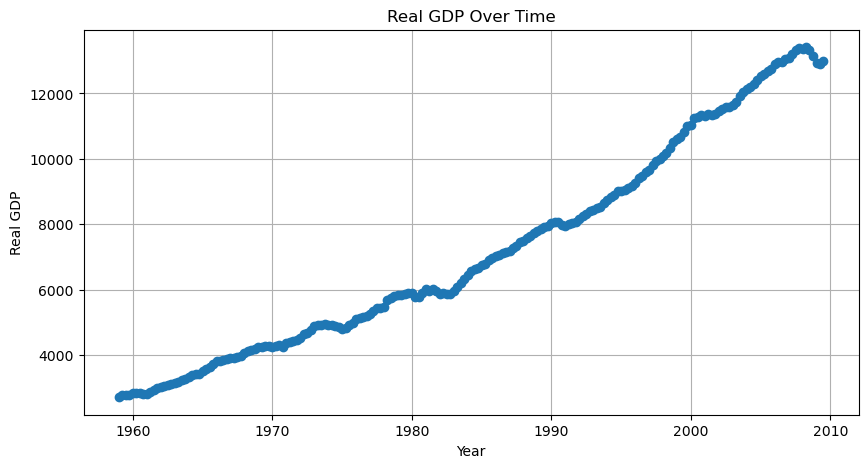

In [155]:


# Plot real GDP over time
plt.figure(figsize=(10, 5))
plt.plot(macro_econ_data.index, macro_econ_data['realgdp'], marker='o', linestyle='-')

# Formatting the plot
plt.title("Real GDP Over Time")
plt.xlabel("Year")
plt.ylabel("Real GDP")
plt.grid(True)
plt.show()

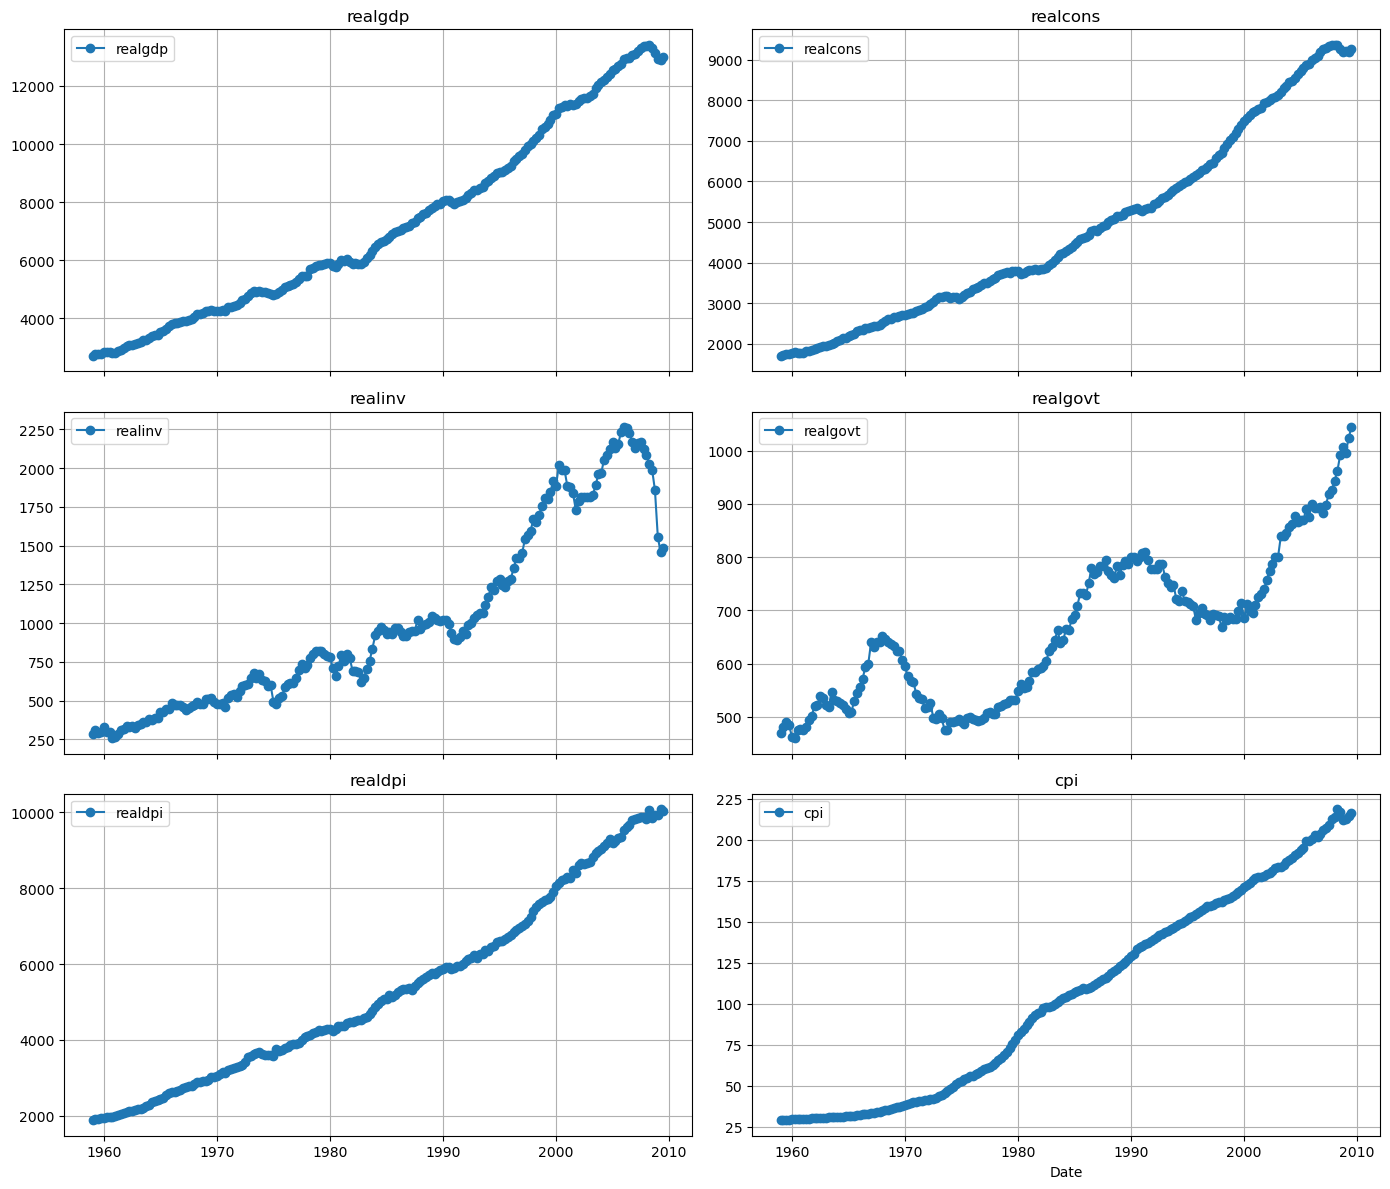

In [156]:
# Select the first 6 columns
data_to_plot = macro_econ_data.iloc[:, :6]

# Create subplots: 3 rows x 2 columns for 6 variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

# Loop over each column and plot
for i, col in enumerate(data_to_plot.columns):

    axes[i].plot(data_to_plot.index, data_to_plot[col], marker='o', label=col)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [193]:
target = macro_econ_data['realgdp'].to_frame() 
exog = macro_econ_data[['realcons', 'realinv', 'realgovt', 'realdpi', 'cpi']]

In [157]:
target = macro_econ_data['realgdp'].to_frame() 
exog = macro_econ_data[['realcons', 'realinv', 'realgovt', 'realdpi', 'cpi']]


In [158]:
target.head()

,realgdp
date,
1959-01-01,2710.349
1959-04-01,2778.801
1959-07-01,2775.488
1959-10-01,2785.204
1960-01-01,2847.699


# Check For Stationarity

## Rolling Statistics

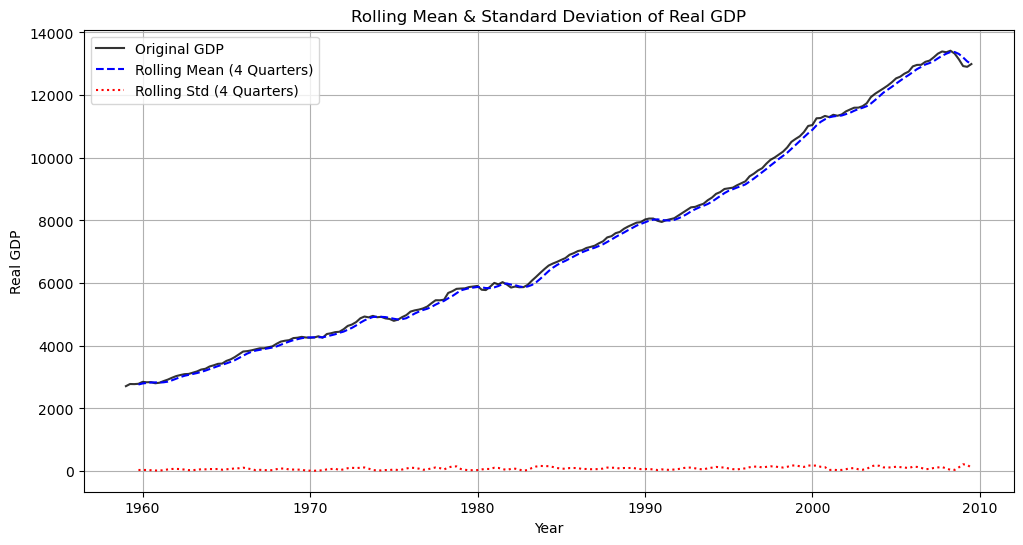

In [159]:
# Selecting GDP data
# gdp = macro_dataframe['realgdp']

# Compute rolling statistics (using window=4 for quarterly data)
rolmean = target.rolling(window=4).mean()
rolstd = target.rolling(window=4).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(target, label='Original GDP', color='black', linestyle='-', alpha=0.8)
plt.plot(rolmean, label='Rolling Mean (4 Quarters)', color='blue', linestyle='--')
plt.plot(rolstd, label='Rolling Std (4 Quarters)', color='red', linestyle=':')

# Formatting
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Real GDP')
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.grid(True)

 The variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series

## ADF Test

In [194]:
# ADF Test
def adf_test(series, alpha=0.05):
    """
    Performs the Augmented Dickey-Fuller (ADF) test on a time series.

    Parameters:
    - series (pd.Series): The time series data to test.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - None (prints the results)
    """
    result = adfuller(series, autolag='AIC')

    # Create results dictionary
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        '# Lags Used': result[2],
        'Number of Observations': result[3],
    }

    # Add critical values
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value

    # Convert to DataFrame for better readability
    output_df = pd.DataFrame(output.items(), columns=['Metric', 'Value'])

    # Print the results
    print("\n🔍 Results of Augmented Dickey-Fuller Test:")
    print(output_df.to_string(index=False))

    # Interpretation
    print("\n📌 Interpretation:")
    if result[1] <= alpha:
        print(f"✅ The time series is **stationary** (p-value = {result[1]:.5f} ≤ {alpha})")
    else:
        print(f"❌ The time series is **not stationary** (p-value = {result[1]:.5f} > {alpha})")


In [195]:
adf_test(target)


🔍 Results of Augmented Dickey-Fuller Test:
                Metric      Value
        Test Statistic   1.750463
               p-value   0.998246
           # Lags Used  12.000000
Number of Observations 190.000000
   Critical Value (1%)  -3.465244
   Critical Value (5%)  -2.876875
  Critical Value (10%)  -2.574945

📌 Interpretation:
❌ The time series is **not stationary** (p-value = 0.99825 > 0.05)


# Elimination of Stationarity 

##  Elimination non-constant mean with differencing (Trend)



In [162]:
target_diff = pd.Series(target['realgdp'].diff().dropna())

In [163]:
adf_test(target_diff)


🔍 Results of Augmented Dickey-Fuller Test:
                Metric         Value
        Test Statistic -6.305696e+00
               p-value  3.327882e-08
           # Lags Used  1.000000e+00
Number of Observations  2.000000e+02
   Critical Value (1%) -3.463476e+00
   Critical Value (5%) -2.876102e+00
  Critical Value (10%) -2.574532e+00

📌 Interpretation:
✅ The time series is **stationary** (p-value = 0.00000 ≤ 0.05)


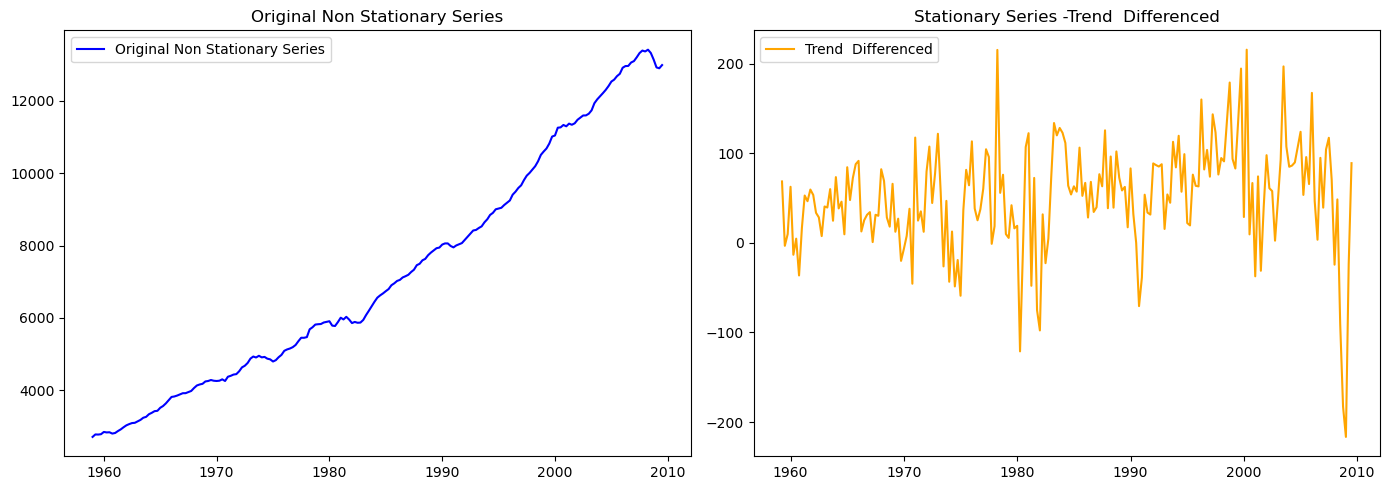

In [164]:
#plot the series to compare 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original series
axes[0].plot(target, label='Original Non Stationary Series', color='blue')
axes[0].set_title('Original Non Stationary Series')
axes[0].legend()

# Box-Cox transformed series
axes[1].plot(target_diff, label='Trend  Differenced', color='orange')
axes[1].set_title('Stationary Series -Trend  Differenced')
axes[1].legend()

plt.tight_layout()
plt.show()


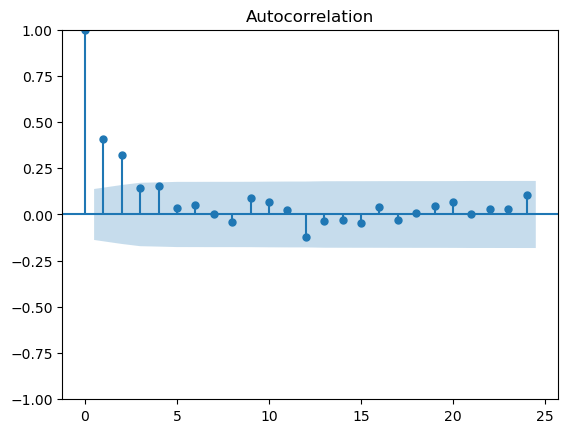

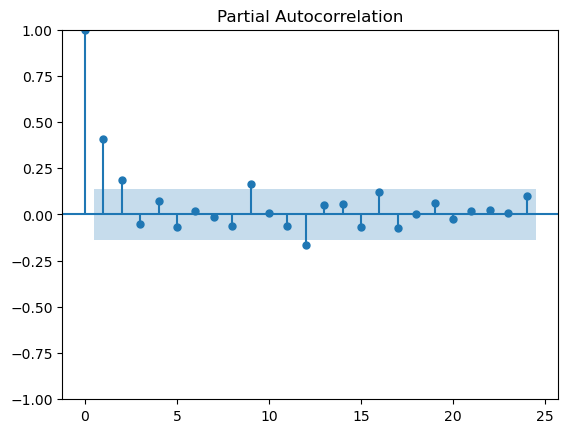

In [165]:
plot_acf(target_diff)
plot_pacf(target_diff)
plt.show()

# Train Test Split Data

In [196]:
macro_econ_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-01-01 to 2009-07-01
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   realgdp   203 non-null    float64
 1   realcons  203 non-null    float64
 2   realinv   203 non-null    float64
 3   realgovt  203 non-null    float64
 4   realdpi   203 non-null    float64
 5   cpi       203 non-null    float64
 6   m1        203 non-null    float64
 7   tbilrate  203 non-null    float64
 8   unemp     203 non-null    float64
 9   pop       203 non-null    float64
 10  infl      203 non-null    float64
 11  realint   203 non-null    float64
dtypes: float64(12)
memory usage: 20.6 KB


In [166]:

target_train = target[:193]
exog_train = exog[:193] 


target_test = target[193:]
exog_test = exog[193:] 

In [167]:
print(len(target_test))

10


In [168]:
target_train.head()

,realgdp
date,
1959-01-01,2710.349
1959-04-01,2778.801
1959-07-01,2775.488
1959-10-01,2785.204
1960-01-01,2847.699


In [169]:
exog_train.head()

,realcons,realinv,realgovt,realdpi,cpi
date,,,,,
1959-01-01,1707.4,286.898,470.045,1886.9,28.98
1959-04-01,1733.7,310.859,481.301,1919.7,29.15
1959-07-01,1751.8,289.226,491.260,1916.4,29.35
1959-10-01,1753.7,299.356,484.052,1931.3,29.37
1960-01-01,1770.5,331.722,462.199,1955.5,29.54


In [170]:
target_test.tail()

,realgdp
date,
2008-07-01,13324.600
2008-10-01,13141.920
2009-01-01,12925.410
2009-04-01,12901.504
2009-07-01,12990.341


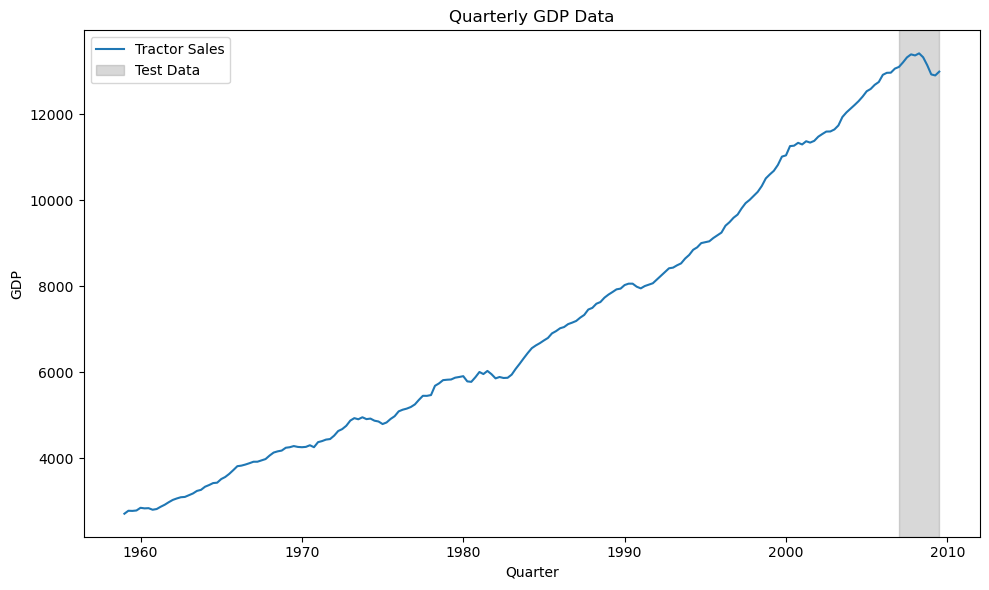

In [197]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(target.index, target, label='Tractor Sales')

# Highlight the period corresponding to the test data
plt.axvspan(target_train.index[-1], target.index[-1], color='gray', alpha=0.3, label='Test Data')

# Add labels, title, and show legend
plt.xlabel('Quarter')
plt.ylabel('GDP')
plt.title('Quarterly GDP Data')
plt.legend()

plt.tight_layout()
plt.show()

# Identify Order of ARIMA Model

## Best Order Selection

### Grid Search Method

In [172]:
from itertools import product
import pandas as pd


p_range = range(0, 4, 1)
d = 1
q_range = range(0, 4, 1)
P_range = range(0, 4, 1)
D = 0
Q_range = range(0, 4, 1)
s = 4

parameters = product(p_range, q_range, P_range, Q_range)
parameters_list = list(parameters)
print(len(parameters_list))


256


In [173]:
#gridsearch
# result_df = optimize_SARIMAX(target_train, exog_train, parameters_list, d, D, s)
# result_df

## pmdarima Method

In [202]:
from pmdarima import auto_arima

# Fit the SARIMA model using auto_arima with exogenous variables
model = auto_arima(
    target_train,  # Endogenous variable (target)
    exogenous=exog_train,  # Exogenous variables (if any)
    d=d,
    D=D,
    seasonal=True,
    m=s,  # Periodicity of the seasonality (e.g., 12 for monthly data with yearly seasonality)
    p=p_range,  # List of possible p values
    q=q_range,  # List of possible q values
    P=P_range,  # List of possible P values
    Q=Q_range,  # List of possible Q values
    stepwise=True,  # Stepwise optimization for hyperparameter selection
    trace=True,  # Print progress during the optimization process
    error_action='ignore',  # Ignore any errors during model fitting
    suppress_warnings=True  # Suppress warnings
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=2056.329, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=2079.213, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=2057.174, Time=0.67 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=2061.945, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=2211.414, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=2053.957, Time=1.70 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=2053.352, Time=0.51 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=2054.777, Time=1.50 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=2053.210, Time=0.71 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=2053.229, Time=0.87 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=2052.192, Time=1.24 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=2053.868, Time=1.61 sec
 ARIMA(1,1,2)(0,0,2)[4] intercept   : AIC=2053.021, Time=0.89 sec
 ARIMA(1,1,2)(1,0,2)[4] intercept   : AIC=2054.044, Time=2.07 sec
 ARIMA(0,1,2)(0,0,1)[4] intercept

,"(p, q, P, Q)",AIC
0,"(0, 1, 3, 0, 0, 1)",2051.788059


In [204]:
best_model = SARIMAX(target_train, exog_train, order=(0,1,3), seasonal_order=(0,0,1,4), simple_differencing=False)
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             realgdp   No. Observations:                  193
Model:             SARIMAX(0, 1, 3)x(0, 0, [1], 4)   Log Likelihood                -829.308
Date:                             Sat, 08 Mar 2025   AIC                           1678.615
Time:                                     07:36:46   BIC                           1711.190
Sample:                                 01-01-1959   HQIC                          1691.808
                                      - 01-01-2007                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
realcons       0.9987      0.054     18.357      0.000       0.892       1.105
realinv        0.9857      

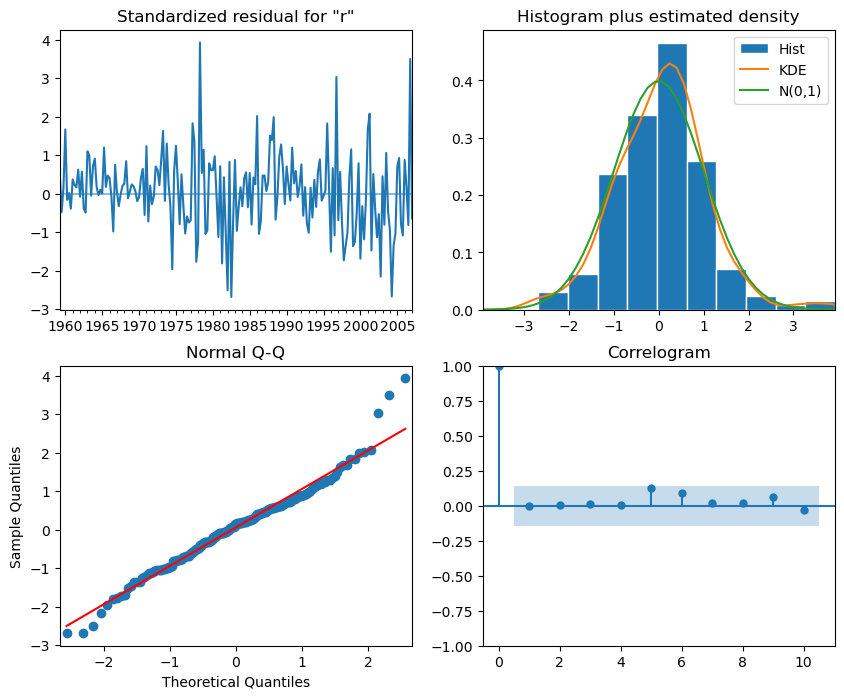

In [205]:
best_model_fit.plot_diagnostics(figsize=(10,8));


# Forecast and Evaluate Model

In [206]:
def recursive_forecast(endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i]['realgdp'].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(0,1,3), seasonal_order=(0,0,0,4), simple_differencing=False)
            result = model.fit(disp=False)
            predictions = result.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [207]:
target_train

,realgdp
date,
1959-01-01,2710.349
1959-04-01,2778.801
1959-07-01,2775.488
1959-10-01,2785.204
1960-01-01,2847.699
...,...
2006-01-01,12915.938
2006-04-01,12962.462
2006-07-01,12965.916


In [208]:
target_test

,realgdp
date,
2007-04-01,13203.977
2007-07-01,13321.109
2007-10-01,13391.249
2008-01-01,13366.865
2008-04-01,13415.266
2008-07-01,13324.600
2008-10-01,13141.920
2009-01-01,12925.410
2009-04-01,12901.504


In [210]:
# target_train = target[:196]
# target_test = target[196:]

pred_df = pd.DataFrame({'actual': target_test['realgdp']})

TRAIN_LEN = len(target_train)
HORIZON = len(target_test)
WINDOW = 1

pred_last_value = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_SARIMAX = recursive_forecast(target, exog, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df['pred_last_value'] = pred_last_value
pred_df['pred_SARIMAX'] = pred_SARIMAX

pred_df


,actual,pred_last_value,pred_SARIMAX
date,,,
2007-04-01,13203.977,13099.901,13109.768353
2007-07-01,13321.109,13203.977,13178.683501
2007-10-01,13391.249,13321.109,13280.365989
2008-01-01,13366.865,13391.249,13333.497100
2008-04-01,13415.266,13366.865,13372.140177
2008-07-01,13324.600,13415.266,13369.932093
2008-10-01,13141.920,13324.600,13320.771260
2009-01-01,12925.410,13141.920,13122.050440
2009-04-01,12901.504,12925.410,12882.708731


In [211]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [212]:
mape_last = mape(pred_df.actual, pred_df.pred_last_value)
mape_SARIMAX = mape(pred_df.actual, pred_df.pred_SARIMAX)

print(mape_last, mape_SARIMAX)

0.7349234608581554 0.7558347579723954


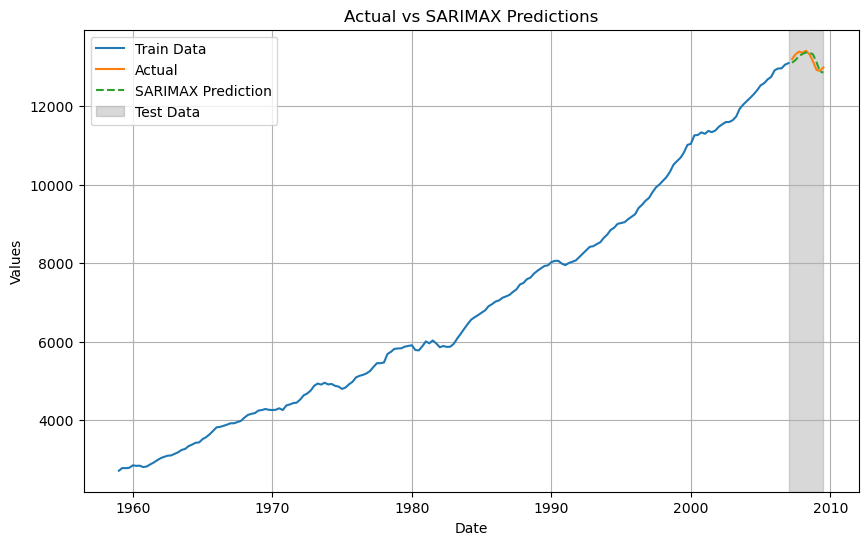

In [213]:
# Plotting actual vs SARIMAX predictions
plt.figure(figsize=(10, 6))
plt.plot(target_train.index, target_train, label='Train Data')

plt.plot(pred_df.index, pred_df['actual'], label='Actual', linestyle='-')
plt.plot(pred_df.index, pred_df['pred_SARIMAX'], label='SARIMAX Prediction', linestyle='--')
plt.axvspan(target_train.index[-1], target.index[-1], color='gray', alpha=0.3, label='Test Data')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs SARIMAX Predictions')
plt.legend()
plt.grid(True)
plt.show()